In [54]:
import pandas as pd


df = pd.read_csv("https://covidtracking.com/api/v1/states/daily.csv")

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# df.head()
# df.describe()
#df['state']

df[df['state'] == 'NV']
nv_df = df[df['state'] == 'NV']

nv_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResults', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')

In [51]:
nv_df[['date','positiveIncrease','totalTestResultsIncrease']]

,date,positiveIncrease,totalTestResultsIncrease
36,2020-06-28,821,4554
92,2020-06-27,1099,4364
148,2020-06-26,381,3112
204,2020-06-25,497,3163
260,2020-06-24,365,3861
...,...,...,...
6216,2020-03-09,0,0
6266,2020-03-08,0,0
6316,2020-03-07,0,0
6356,2020-03-06,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x106db2c88>,
      dtype=object)

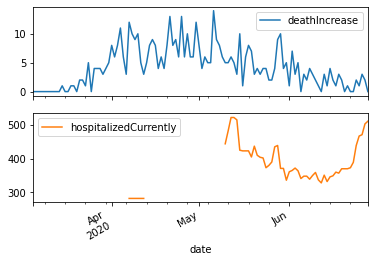

In [58]:
nv_df.plot(x='date', y=['deathIncrease','hospitalizedCurrently'], subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115db0748>,
      dtype=object)

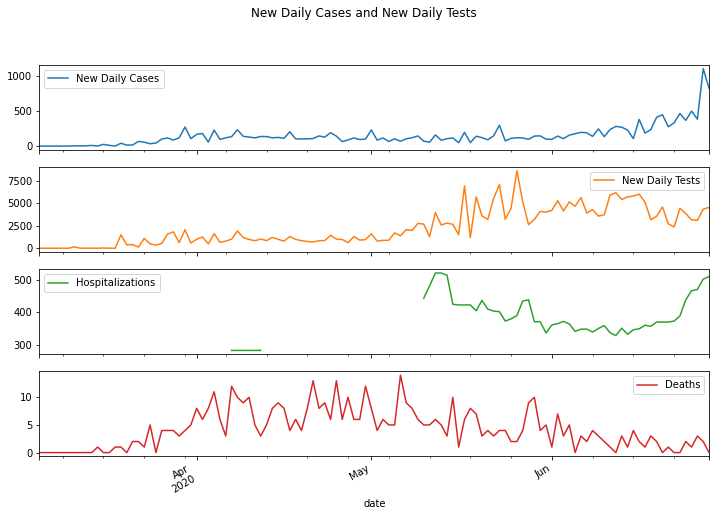

In [63]:
nv_df.plot(x='date',
                      y=['positiveIncrease','totalTestResultsIncrease','hospitalizedCurrently','deathIncrease'],
                      title='New Daily Cases and New Daily Tests',
                      subplots=True,
                      label=['New Daily Cases','New Daily Tests','Hospitalizations','Deaths'],
                      figsize=(12,8))

In [111]:
nv_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,negativeRegularScore,negativeScore,positiveScore,score,grade,positive_rolling,rolling,positive_SMA3,positive_SMA7,positive_SMA2
36,2020-06-28,NV,17160.0,250420.0,NaN,511.0,NaN,122.0,NaN,59.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
92,2020-06-27,NV,16339.0,246687.0,NaN,503.0,NaN,117.0,NaN,66.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,16749.5
148,2020-06-26,NV,15240.0,243422.0,NaN,471.0,NaN,118.0,NaN,59.0,...,0,0,0,0,NaN,16269.5,16269.5,16246.333333,NaN,15789.5
204,2020-06-25,NV,14859.0,240691.0,NaN,467.0,NaN,98.0,NaN,57.0,...,0,0,0,0,NaN,15419.5,15419.5,15479.333333,NaN,15049.5
260,2020-06-24,NV,14362.0,238025.0,NaN,439.0,NaN,96.0,NaN,53.0,...,0,0,0,0,NaN,14830.0,14830.0,14820.333333,NaN,14610.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,2020-03-09,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,2.0,2.0,2.333333,9.428571,1.0
6266,2020-03-08,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,1.0,1.0,1.000000,6.571429,1.0
6316,2020-03-07,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,1.0,1.0,1.000000,3.857143,1.0
6356,2020-03-06,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,1.0,1.0,1.000000,2.428571,1.0


In [125]:
nv_df['positive_SMA2'] = nv_df.loc[:,'positive'].rolling(window=2).mean()
nv_df['totalTestResultsIncrease_SMA7'] = nv_df.loc[:,'totalTestResultsIncrease'].rolling(window=7).mean()
nv_df['deathIncrease_SMA3'] = nv_df.loc[:,'deathIncrease'].rolling(window=3).mean()

/Users/hectorurtubia/.local/share/virtualenvs/coviddatajupyter-SE-uf2uP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/hectorurtubia/.local/share/virtualenvs/coviddatajupyter-SE-uf2uP/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hectorurtubia/.local/share/virtualenvs/coviddatajupyter-SE-uf2uP/lib/python3.7/site-packages/ipykernel_launcher.py

In [117]:
nv_df


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,negativeScore,positiveScore,score,grade,positive_rolling,rolling,positive_SMA3,positive_SMA7,positive_SMA2,totalTestResultsIncrease_SMA2
36,2020-06-28,NV,17160.0,250420.0,NaN,511.0,NaN,122.0,NaN,59.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,2020-06-27,NV,16339.0,246687.0,NaN,503.0,NaN,117.0,NaN,66.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,16749.5,4459.0
148,2020-06-26,NV,15240.0,243422.0,NaN,471.0,NaN,118.0,NaN,59.0,...,0,0,0,NaN,16269.5,16269.5,16246.333333,NaN,15789.5,3738.0
204,2020-06-25,NV,14859.0,240691.0,NaN,467.0,NaN,98.0,NaN,57.0,...,0,0,0,NaN,15419.5,15419.5,15479.333333,NaN,15049.5,3137.5
260,2020-06-24,NV,14362.0,238025.0,NaN,439.0,NaN,96.0,NaN,53.0,...,0,0,0,NaN,14830.0,14830.0,14820.333333,NaN,14610.5,3512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,2020-03-09,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,2.0,2.0,2.333333,9.428571,1.0,0.0
6266,2020-03-08,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,1.0,1.0,1.000000,6.571429,1.0,0.0
6316,2020-03-07,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,1.0,1.0,1.000000,3.857143,1.0,0.0
6356,2020-03-06,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,1.0,1.0,1.000000,2.428571,1.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x123757a90>,
      dtype=object)

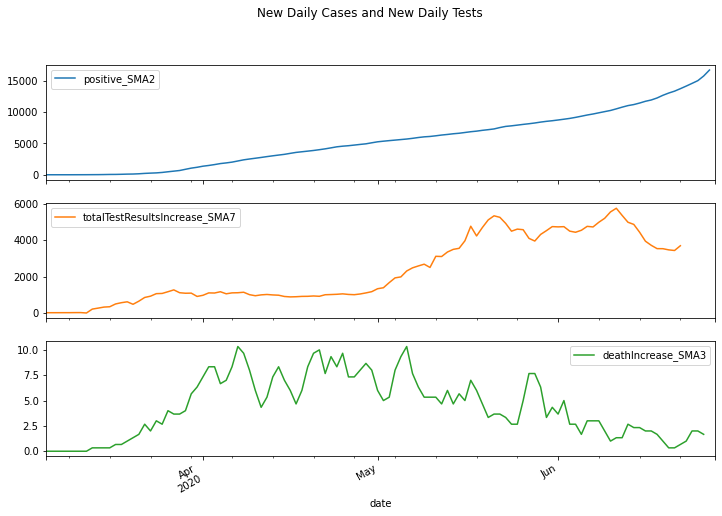

In [126]:
nv_df.plot(x='date',
                      y=['positive_SMA2','totalTestResultsIncrease_SMA7','deathIncrease_SMA3'],
                      title='New Daily Cases and New Daily Tests',
                      subplots=True,
                      #label=['New Daily Cases','New Daily Tests'],
                      figsize=(12,8))

In [128]:
nv_df.columns



Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResults', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade', 'positive_rolling', 'rolling', 'positive_SMA3',
       'positive_SMA7', 'positive_SMA2', 'totalTestResultsIncrease_SMA2',
       'totalTestResultsIncrease_SMA3', 'totalTestResultsIncrease_SMA7',
       'deathIncrease_SMA3'],
      dtype='object')

In [134]:
nv_df['positivityRate'] = nv_df['positiveIncrease'] / nv_df['totalTestResultsIncrease']

/Users/hectorurtubia/.local/share/virtualenvs/coviddatajupyter-SE-uf2uP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
nv_df.loc[:,'positivityRate_SMA7'] = nv_df.loc[:,'positivityRate'].rolling(7).mean()

/Users/hectorurtubia/.local/share/virtualenvs/coviddatajupyter-SE-uf2uP/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [136]:
nv_df


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,rolling,positive_SMA3,positive_SMA7,positive_SMA2,totalTestResultsIncrease_SMA2,totalTestResultsIncrease_SMA3,totalTestResultsIncrease_SMA7,deathIncrease_SMA3,positivityRate,positivityRate_SMA7
36,2020-06-28,NV,17160.0,250420.0,NaN,511.0,NaN,122.0,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180281,NaN
92,2020-06-27,NV,16339.0,246687.0,NaN,503.0,NaN,117.0,NaN,66.0,...,NaN,NaN,NaN,16749.5,4459.0,NaN,NaN,NaN,0.251833,NaN
148,2020-06-26,NV,15240.0,243422.0,NaN,471.0,NaN,118.0,NaN,59.0,...,16269.5,16246.333333,NaN,15789.5,3738.0,4010.000000,NaN,1.666667,0.122429,NaN
204,2020-06-25,NV,14859.0,240691.0,NaN,467.0,NaN,98.0,NaN,57.0,...,15419.5,15479.333333,NaN,15049.5,3137.5,3546.333333,NaN,2.000000,0.157129,NaN
260,2020-06-24,NV,14362.0,238025.0,NaN,439.0,NaN,96.0,NaN,53.0,...,14830.0,14820.333333,NaN,14610.5,3512.0,3378.666667,NaN,2.000000,0.094535,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,2020-03-09,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.333333,9.428571,1.0,0.0,52.666667,24.857143,0.000000,NaN,NaN
6266,2020-03-08,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.000000,6.571429,1.0,0.0,0.000000,24.714286,0.000000,NaN,NaN
6316,2020-03-07,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.000000,3.857143,1.0,0.0,0.000000,23.428571,0.000000,NaN,NaN
6356,2020-03-06,NV,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.000000,2.428571,1.0,0.0,0.000000,22.857143,0.000000,NaN,NaN


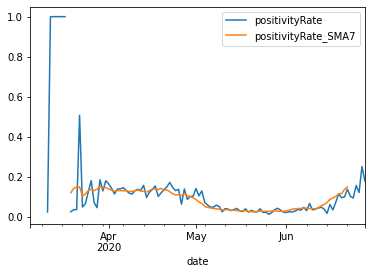

In [137]:
nv_df.plot(x='date',y=['positivityRate','positivityRate_SMA7'])